# The Data Cleaning Process - Exam Score Prediction

## Load dataset in Pandas

In [1]:
# Bibliotheken importieren
import pandas as pd
import numpy as np
import os
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Zufallsseed setzen für Reproduzierbarkeit
np.random.seed(42)

# Datensatz einlesen
df = pd.read_csv("exam_score_prediction.csv")

# define and set relevant columns
# ignored student_id because it is not unique (for some reason) and it does not contribute to research question. I will use index for indexing instead :)
important = [
    "age",
    "gender",
    "course",
    "study_hours",
    "class_attendance",
    "internet_access",
    "sleep_hours",
    "sleep_quality",
    "study_method",
    "facility_rating",
    "exam_difficulty",
    "exam_score",
]
df = df[important]
df

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,18,other,bba,6.50,71.3,yes,5.0,good,self-study,low,easy,86.5
19996,18,male,b.com,3.71,41.6,no,5.9,average,coaching,medium,moderate,60.9
19997,19,other,diploma,7.88,68.2,yes,4.6,poor,group study,low,easy,64.5
19998,19,male,bba,4.60,76.3,no,6.1,good,self-study,medium,moderate,79.0


---

## 1. Inspecting Data

### Getting an Initial Overview

In [3]:
# Check dimensions
print("rows:", df.shape[0])
print("colums:", df.shape[1])

rows: 20000
colums: 12


In [4]:
# Erste Zeilen anzeigen
df.head()

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [5]:
df.describe()

,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,20.473300,4.007604,70.017365,7.00856,62.513225
std,2.284458,2.308313,17.282262,1.73209,18.908491
min,17.000000,0.080000,40.600000,4.10000,19.599000
25%,18.000000,2.000000,55.100000,5.50000,48.800000
50%,20.000000,4.040000,69.900000,7.00000,62.600000
75%,22.000000,6.000000,85.000000,8.50000,76.300000
max,24.000000,7.910000,99.400000,9.90000,100.000000


In [6]:
# Informationen zu Spalten und Datentypen
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               20000 non-null  int64  
 1   gender            20000 non-null  object 
 2   course            20000 non-null  object 
 3   study_hours       20000 non-null  float64
 4   class_attendance  20000 non-null  float64
 5   internet_access   20000 non-null  object 
 6   sleep_hours       20000 non-null  float64
 7   sleep_quality     20000 non-null  object 
 8   study_method      20000 non-null  object 
 9   facility_rating   20000 non-null  object 
 10  exam_difficulty   20000 non-null  object 
 11  exam_score        20000 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.8+ MB


---

## 2. Missing Data

### Identify missing values

In [7]:
# count missing values
missing = df.isnull().sum()
missing

age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

In [8]:
# calculate percentage of missing values
missing_pct = (missing / len(df)) * 100
print(f"missing values percentage:\n{missing_pct}")

# optional: visualizing with Heatmap

missing values percentage:
age                 0.0
gender              0.0
course              0.0
study_hours         0.0
class_attendance    0.0
internet_access     0.0
sleep_hours         0.0
sleep_quality       0.0
study_method        0.0
facility_rating     0.0
exam_difficulty     0.0
exam_score          0.0
dtype: float64


In [9]:
df.isna().sum()

age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

### Visualize

<Axes: >

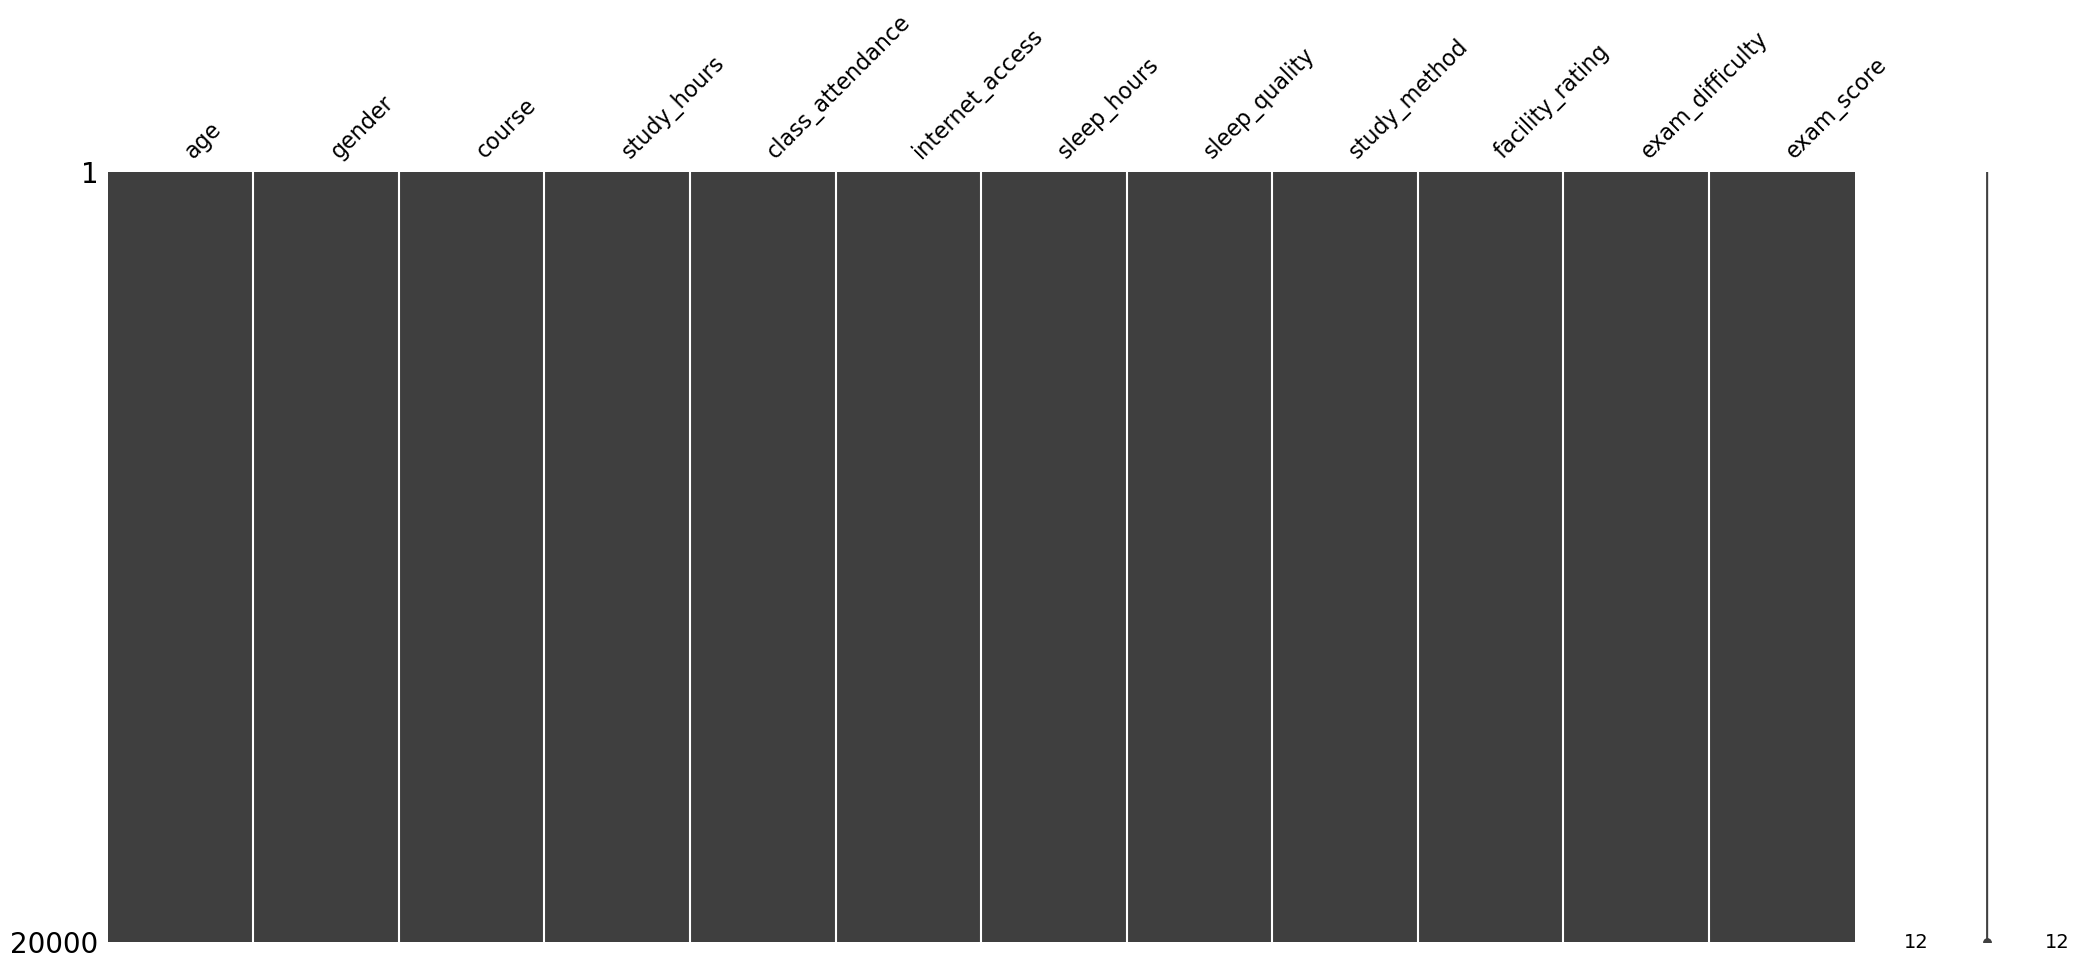

In [10]:
msno.matrix(df)

In [11]:
# Strategies for dealing with missing values - which we do not have here

# Strategie 1: Zeilen mit fehlenden Werten löschen (falls anwendbar)
# df.dropna()
# df = df.dropna(subset=['spaltenname'])


# Strategie 2: Spalten mit zu vielen fehlenden Werten löschen
# df = df.drop(columns=['spaltenname'])


# Strategie 3: Numerische Werte imputieren
# df.fillna(df.mean())
# df['spaltenname'] = df['spaltenname'].fillna(df['spaltenname'].median())


# Strategie 4: Kategoriale Werte imputieren
# df['spaltenname'] = df['spaltenname'].fillna('Unknown')

# Strategie 5: Forward/Backward Fill (Time series: use previous/next value)
# df.fillna(method='ffill')

# Strategie 6: Interpolation
# df.interpolate()

---

## 3. Data Type Conversion

### Check data types

In [12]:
# Datentypen anzeigen
print("dtypes before:")
print(df.dtypes)

dtypes before:
age                   int64
gender               object
course               object
study_hours         float64
class_attendance    float64
internet_access      object
sleep_hours         float64
sleep_quality        object
study_method         object
facility_rating      object
exam_difficulty      object
exam_score          float64
dtype: object


### Convert

In [13]:
# columns to convert to "category" dtype
categorical_cols = [
    "gender",
    "course",
    "sleep_quality",
    "study_method",
    "facility_rating",
    "exam_difficulty",
]

# before: object (strings) -> after: category
df = df.astype({col: "category" for col in categorical_cols})

# internet_access
# before: object (string: yes/no) -> after: bool (True/False)
df["internet_access"] = df["internet_access"].map({"yes": True, "no": False})

print("dtypes after:")
print(df.dtypes)

dtypes after:
age                    int64
gender              category
course              category
study_hours          float64
class_attendance     float64
internet_access         bool
sleep_hours          float64
sleep_quality       category
study_method        category
facility_rating     category
exam_difficulty     category
exam_score           float64
dtype: object


In [14]:
# Zwischenstand
df

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,17,male,diploma,2.78,92.9,True,7.4,poor,coaching,low,hard,58.9
1,23,other,bca,3.37,64.8,True,4.6,average,online videos,medium,moderate,54.8
2,22,male,b.sc,7.88,76.8,True,8.5,poor,coaching,high,moderate,90.3
3,20,other,diploma,0.67,48.4,True,5.8,average,online videos,low,moderate,29.7
4,20,female,diploma,0.89,71.6,True,9.8,poor,coaching,low,moderate,43.7
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,18,other,bba,6.50,71.3,True,5.0,good,self-study,low,easy,86.5
19996,18,male,b.com,3.71,41.6,False,5.9,average,coaching,medium,moderate,60.9
19997,19,other,diploma,7.88,68.2,True,4.6,poor,group study,low,easy,64.5
19998,19,male,bba,4.60,76.3,False,6.1,good,self-study,medium,moderate,79.0


---

## 4. Detecting & Removing Duplicates

In [15]:
# find and count duplicates
df.duplicated().sum()

np.int64(0)

In [16]:
# show duplicates
df[df.duplicated()]

# remove duplicates
# df.drop_duplicates()

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score


---

## 5. Detecting & Handling Outliers

### Select numeric colums

In [17]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols

Index(['age', 'study_hours', 'class_attendance', 'sleep_hours', 'exam_score'], dtype='object')

### Statistics and Boxplots

age-Statistics:

count    20000.000000
mean        20.473300
std          2.284458
min         17.000000
25%         18.000000
50%         20.000000
75%         22.000000
max         24.000000
Name: age, dtype: float64


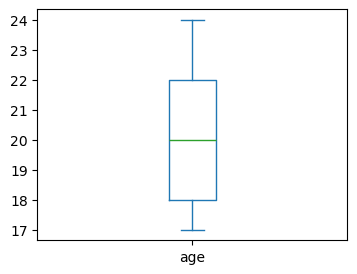

study_hours-Statistics:

count    20000.000000
mean         4.007604
std          2.308313
min          0.080000
25%          2.000000
50%          4.040000
75%          6.000000
max          7.910000
Name: study_hours, dtype: float64


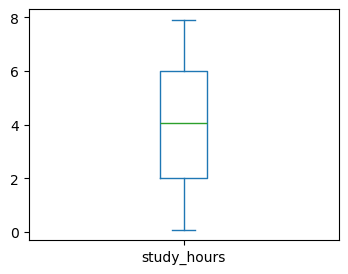

class_attendance-Statistics:

count    20000.000000
mean        70.017365
std         17.282262
min         40.600000
25%         55.100000
50%         69.900000
75%         85.000000
max         99.400000
Name: class_attendance, dtype: float64


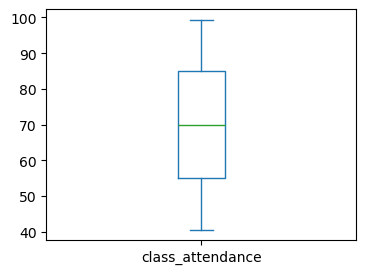

sleep_hours-Statistics:

count    20000.00000
mean         7.00856
std          1.73209
min          4.10000
25%          5.50000
50%          7.00000
75%          8.50000
max          9.90000
Name: sleep_hours, dtype: float64


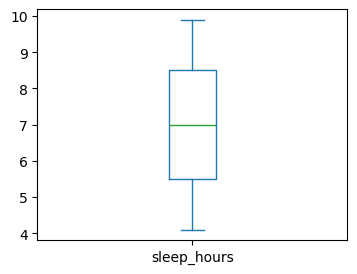

exam_score-Statistics:

count    20000.000000
mean        62.513225
std         18.908491
min         19.599000
25%         48.800000
50%         62.600000
75%         76.300000
max        100.000000
Name: exam_score, dtype: float64


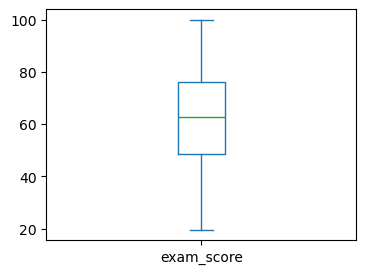

In [18]:
for col in numeric_cols:
    print(f"{col}-Statistics:\n")
    print(df[col].describe())   # prints statistic
    df[col].plot.box(figsize=(4, 3))
    plt.show()  # prints boxplot

### Identify Outliers with IQR-Method

In [19]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}-outliers")
    display(outliers)

age-outliers


,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score


study_hours-outliers


,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score


class_attendance-outliers


,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score


sleep_hours-outliers


,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score


exam_score-outliers


,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score


### Handling Outliers

After examining the statistics and boxplots as well as identifying outliers with the IQR-method, it seems like there are no outliers in this dataset we have to handle. By looking at the statistics I also made sure, that there are no unrealistic numeric values, e.g. negative ages, study hours, class attendance percentages, sleep hours and exam scores.

In [20]:
# Beispiel: Ausreißer entfernen
# df = df[(df['spaltenname'] >= lower_bound) & (df['spaltenname'] <= upper_bound)]

# Beispiel: Capping anwenden
# df['spaltenname'] = df['spaltenname'].clip(lower=lower_bound, upper=upper_bound)

---

## 6. Consistency & Standardization

In [21]:
# select categorial columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# show unique values for every categorial column
for col in categorical_cols:
    print(df[col].value_counts(), "\n")

gender
other     6726
male      6695
female    6579
Name: count, dtype: int64 

course
bca        2902
ba         2896
b.sc       2878
b.com      2864
bba        2836
diploma    2826
b.tech     2798
Name: count, dtype: int64 

sleep_quality
average    6694
poor       6687
good       6619
Name: count, dtype: int64 

study_method
self-study       4079
online videos    4069
coaching         4036
group study      3922
mixed            3894
Name: count, dtype: int64 

facility_rating
medium    6760
low       6638
high      6602
Name: count, dtype: int64 

exam_difficulty
moderate    9878
easy        6141
hard        3981
Name: count, dtype: int64 



All the categories are consistent and as expected. But for even more clarity I decided to adapt the presumably Indian "course" categories to our German system.

In [22]:
# Indian degree → German degree
degree_mapping = {
    'bca': 'B.Sc.',
    'ba': 'B.A.',
    'b.sc': 'B.Sc.',
    'b.com': 'B.A.',
    'bba': 'B.A.',
    'diploma': 'Diploma',
    'b.tech': 'B.Eng.'
}

df['course'] = df['course'].str.lower().map(degree_mapping)
df

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,17,male,Diploma,2.78,92.9,True,7.4,poor,coaching,low,hard,58.9
1,23,other,B.Sc.,3.37,64.8,True,4.6,average,online videos,medium,moderate,54.8
2,22,male,B.Sc.,7.88,76.8,True,8.5,poor,coaching,high,moderate,90.3
3,20,other,Diploma,0.67,48.4,True,5.8,average,online videos,low,moderate,29.7
4,20,female,Diploma,0.89,71.6,True,9.8,poor,coaching,low,moderate,43.7
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,18,other,B.A.,6.50,71.3,True,5.0,good,self-study,low,easy,86.5
19996,18,male,B.A.,3.71,41.6,False,5.9,average,coaching,medium,moderate,60.9
19997,19,other,Diploma,7.88,68.2,True,4.6,poor,group study,low,easy,64.5
19998,19,male,B.A.,4.60,76.3,False,6.1,good,self-study,medium,moderate,79.0


---

## 7. Final Check

In [23]:
print("Final Dimensions:")
print(df.shape)

Final Dimensions:
(20000, 12)


In [24]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64


In [25]:
print("Data types:")
print(df.dtypes)

Data types:
age                    int64
gender              category
course                object
study_hours          float64
class_attendance     float64
internet_access         bool
sleep_hours          float64
sleep_quality       category
study_method        category
facility_rating     category
exam_difficulty     category
exam_score           float64
dtype: object


In [26]:
print("First few rows of the cleaned dataset:")
display(df.head())

First few rows of the cleaned dataset:


,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,17,male,Diploma,2.78,92.9,True,7.4,poor,coaching,low,hard,58.9
1,23,other,B.Sc.,3.37,64.8,True,4.6,average,online videos,medium,moderate,54.8
2,22,male,B.Sc.,7.88,76.8,True,8.5,poor,coaching,high,moderate,90.3
3,20,other,Diploma,0.67,48.4,True,5.8,average,online videos,low,moderate,29.7
4,20,female,Diploma,0.89,71.6,True,9.8,poor,coaching,low,moderate,43.7


---

## 8. Saving the cleaned dataset

In [27]:
df.to_csv('exam_score_prediction_cleaned.csv')
print("Cleaned dataset saved!")

Cleaned dataset saved!
